In [1]:
from __future__ import annotations

import pandas as pd

In [3]:
train = pd.read_parquet("../data/train.parquet")
train.head()

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X882,X883,X884,X885,X886,X887,X888,X889,X890,label
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,15.283,8.425,176.405,44.984,221.389,0.121263,-0.417690,0.005399,0.125948,0.058359,...,1.925423,1.847943,0.005676,0.190791,0.369691,0.377630,0.210153,0.159183,0.530636,0.562539
2023-03-01 00:01:00,38.590,2.336,525.846,321.950,847.796,0.302841,-0.049576,0.356667,0.481087,0.237954,...,1.928569,1.849468,0.005227,0.184660,0.363642,0.374515,0.209573,0.158963,0.530269,0.533686
2023-03-01 00:02:00,0.442,60.250,159.227,136.369,295.596,0.167462,-0.291212,0.083138,0.206881,0.101727,...,1.928047,1.849282,0.004796,0.178719,0.357689,0.371424,0.208993,0.158744,0.529901,0.546505
2023-03-01 00:03:00,4.865,21.016,335.742,124.963,460.705,0.072944,-0.436590,-0.102483,0.017551,0.007149,...,1.928621,1.849608,0.004398,0.172967,0.351832,0.368358,0.208416,0.158524,0.529534,0.357703
2023-03-01 00:04:00,27.158,3.451,98.411,44.407,142.818,0.173820,-0.213489,0.096067,0.215709,0.107133,...,1.927084,1.848950,0.004008,0.167391,0.346066,0.365314,0.207839,0.158304,0.529167,0.362452


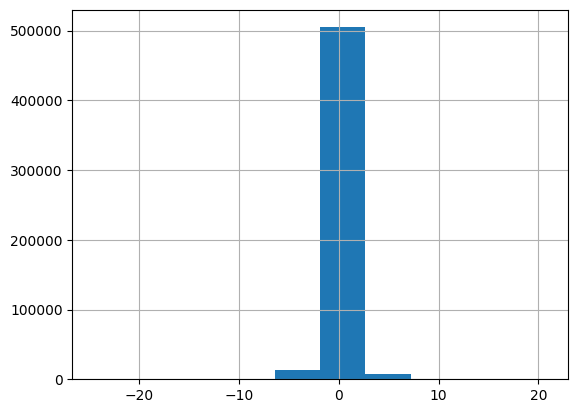

In [5]:
train["label"].hist();

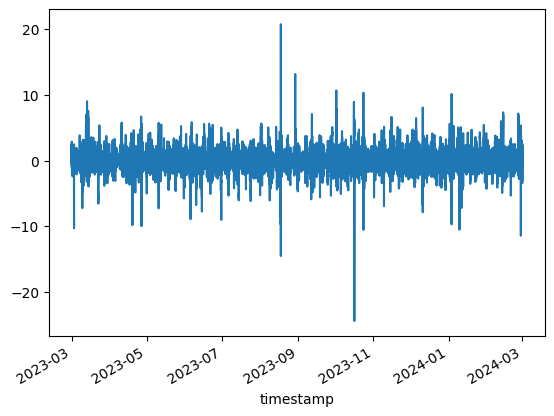

In [6]:
train["label"].plot();

In [7]:
train["label"].mean(), train["label"].std()

(np.float64(0.03612599883311049), np.float64(1.0099135624525448))

In [8]:
(train["label"] >= 0).mean()

np.float64(0.5117487216835556)

In [9]:
test = pd.read_parquet("../data/test.parquet")
test.head()

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X882,X883,X884,X885,X886,X887,X888,X889,X890,label
ID,,,,,,,,,,,,,,,,,,,,,
1,0.114,12.121,10.587,10.971,21.558,-0.732818,0.512331,-0.041982,-0.598260,-0.517646,...,1.014336,1.367567,1.584126,1.584126,1.584126,1.584125,1.567979,1.426368,2.192682,0.0
2,2.426,2.962,136.241,12.304,148.545,-0.337995,-0.412176,-0.259468,-0.334809,-0.247443,...,1.748939,1.848177,0.000131,0.000323,0.001746,0.007319,0.050925,0.142206,0.739759,0.0
3,1.085,2.343,23.390,57.171,80.561,0.111249,0.458221,0.466916,0.574081,0.324722,...,1.704680,1.772028,0.000550,0.003597,0.009265,0.019948,0.072535,0.169672,0.807862,0.0
4,14.793,1.117,116.518,13.082,129.600,-0.149399,-0.640638,-0.873778,-1.026144,-0.508816,...,0.930946,1.037839,1.382037,1.382037,1.382037,1.382037,1.381752,1.363445,2.465509,0.0
5,0.033,14.178,43.800,49.836,93.636,-0.694662,0.611254,0.067671,-0.531632,-0.581450,...,1.080267,1.141878,0.000363,0.012718,0.137533,0.464112,1.050577,1.268567,2.499015,0.0


In [11]:
train[train.columns[train.columns.str.startswith("X")]].corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X881,X882,X883,X884,X885,X886,X887,X888,X889,X890
X1,1.000000,0.598175,0.728431,0.802451,0.866625,0.940304,0.967332,0.982965,0.731654,0.552883,...,-0.017123,-0.015580,-0.014643,-0.007572,-0.005420,-0.002582,0.001999,0.008748,0.010996,0.012671
X2,0.598175,1.000000,0.922680,0.833476,0.750923,0.662548,0.632626,0.615937,0.262676,0.777890,...,-0.000061,0.000159,0.000240,0.001636,0.001772,0.001710,0.001498,0.000750,0.000371,0.000174
X3,0.728431,0.922680,1.000000,0.972715,0.911029,0.814884,0.776297,0.753582,0.362567,0.787828,...,0.001298,0.001278,0.001112,0.002442,0.003184,0.003454,0.003318,0.001897,0.001045,0.000564
X4,0.802451,0.833476,0.972715,1.000000,0.977425,0.899116,0.858607,0.832757,0.436232,0.742130,...,0.001596,0.001771,0.001594,0.002940,0.004196,0.004985,0.005251,0.003420,0.002045,0.001208
X5,0.866625,0.750923,0.911029,0.977425,1.000000,0.962555,0.927415,0.901096,0.513176,0.685651,...,0.000102,0.001165,0.001413,0.002205,0.004044,0.005653,0.006955,0.005498,0.003602,0.002292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X886,-0.002582,0.001710,0.003454,0.004985,0.005653,0.002183,-0.000380,-0.000578,-0.023458,0.003132,...,-0.438329,-0.459738,-0.395241,0.972848,0.993689,1.000000,0.991564,0.929717,0.834224,0.663429
X887,0.001999,0.001498,0.003318,0.005251,0.006955,0.005634,0.003743,0.003788,-0.017137,0.003000,...,-0.459776,-0.485858,-0.423630,0.946570,0.973494,0.991564,1.000000,0.963315,0.877700,0.711792
X888,0.008748,0.000750,0.001897,0.003420,0.005498,0.007498,0.007680,0.008926,-0.006386,0.001903,...,-0.493213,-0.544754,-0.503646,0.872325,0.901201,0.929717,0.963315,1.000000,0.967618,0.843537
X889,0.010996,0.000371,0.001045,0.002045,0.003602,0.005984,0.007081,0.009182,-0.001796,0.001264,...,-0.476687,-0.560643,-0.559876,0.775687,0.803544,0.834224,0.877700,0.967618,1.000000,0.947558
